In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('titanic_toy.csv')

In [4]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [5]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

(array([[657.,  57.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [696., 101.,  27.,   2.,  11.,   6.,   0.,   0.,   0.,   3.],
        [891.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [891.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 4 BarContainer objects>)

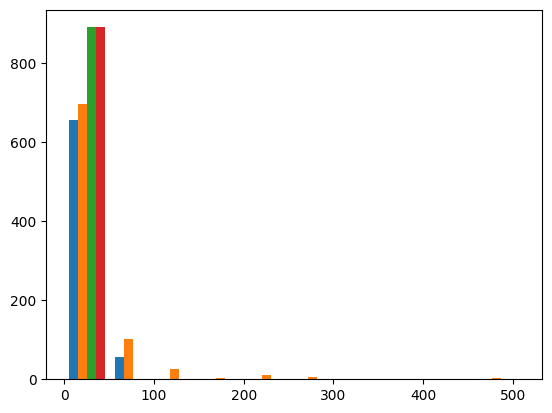

In [7]:
plt.hist(df,bins=10)

In [8]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [9]:
X_train['mean_age'] = X_train['Age'].fillna(mean_age)
X_train['median_age'] = X_train['Age'].fillna(median_age)

X_train['mean_fare'] = X_train['Fare'].fillna(mean_fare)
X_train['median_fare'] = X_train['Fare'].fillna(median_fare)



#X_test['mean_age'] = X_test['Age'].fillna(mean_age)
#X_test['median_age'] = X_test['Age'].fillna(median_age)

#X_test['mean_fare'] = X_test['Fare'].fillna(mean_fare)
#X_test['median_fare'] = X_test['Fare'].fillna(median_fare)

In [10]:
X_train

,Age,Fare,Family,mean_age,median_age,mean_fare,median_fare
30,40.0,27.7208,0,40.000000,40.00,27.7208,27.7208
10,4.0,16.7000,2,4.000000,4.00,16.7000,16.7000
873,47.0,9.0000,0,47.000000,47.00,9.0000,9.0000
182,9.0,31.3875,6,9.000000,9.00,31.3875,31.3875
876,20.0,9.8458,0,20.000000,20.00,9.8458,9.8458
...,...,...,...,...,...,...,...
534,30.0,8.6625,0,30.000000,30.00,8.6625,8.6625
584,NaN,8.7125,0,29.785904,28.75,8.7125,8.7125
493,71.0,49.5042,0,71.000000,71.00,49.5042,49.5042
527,NaN,221.7792,0,29.785904,28.75,221.7792,221.7792


In [11]:
X_train.isnull().mean()*100

Age            20.786517
Fare            5.056180
Family          0.000000
mean_age        0.000000
median_age      0.000000
mean_fare       0.000000
median_fare     0.000000
dtype: float64

In [12]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after mean imputation: ', X_train['mean_age'].var())
print('Age Variance after median imputation: ', X_train['median_age'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after mean imputation: ', X_train['mean_fare'].var())
print('Fare Variance after median imputation: ', X_train['median_fare'].var())

Original Age variable variance:  204.3495133904614
Age Variance after mean imputation:  161.81262452718673
Age Variance after median imputation:  161.9895663346054
Original Fare variable variance:  2448.197913706318
Fare Variance after mean imputation:  2324.2385256705547
Fare Variance after median imputation:  2340.0910219753637


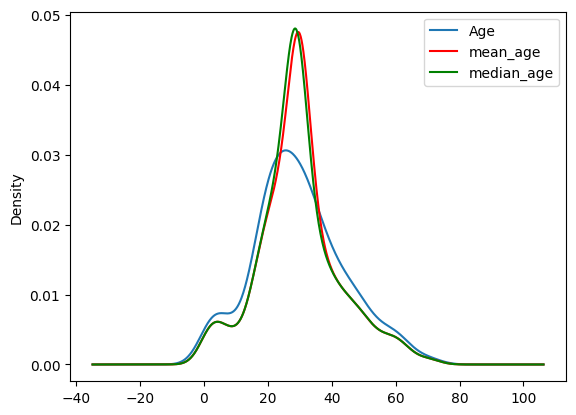

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['mean_age'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['median_age'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

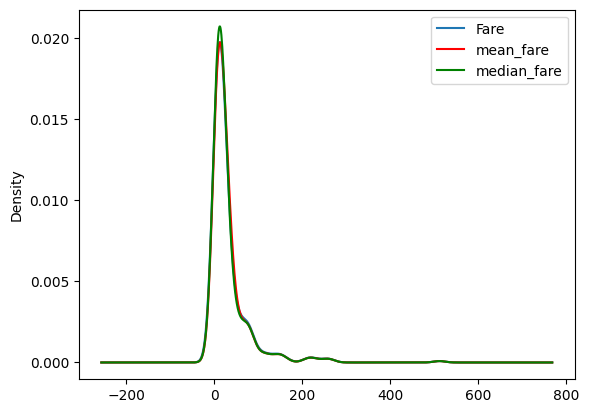

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['mean_fare'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['median_fare'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [15]:
X_train.corr()

,Age,Fare,Family,mean_age,median_age,mean_fare,median_fare
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.090156,0.087356
Fare,0.092644,1.000000,0.208268,0.088069,0.091757,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.244610,-0.242883,0.205499,0.205942
mean_age,1.000000,0.088069,-0.244610,1.000000,0.999454,0.086078,0.083461
median_age,1.000000,0.091757,-0.242883,0.999454,1.000000,0.089673,0.086982
mean_fare,0.090156,1.000000,0.205499,0.086078,0.089673,1.000000,0.996607
median_fare,0.087356,1.000000,0.205942,0.083461,0.086982,0.996607,1.000000


<Axes: >

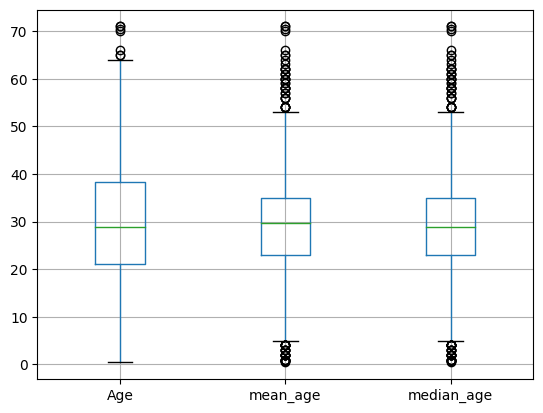

In [16]:
X_train[['Age','mean_age','median_age']].boxplot()

<Axes: >

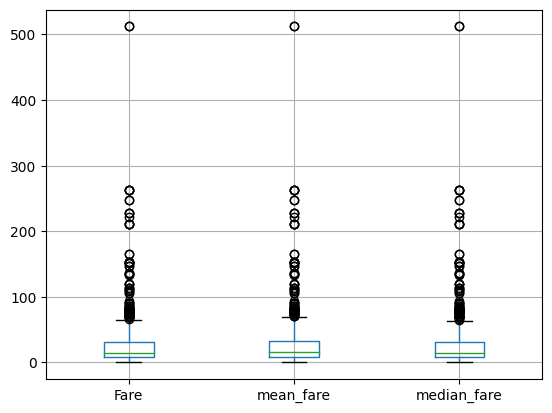

In [17]:
X_train[['Fare','mean_fare','median_fare']].boxplot()

# Using Sklearn

In [18]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [19]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [20]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [21]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [22]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [23]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [24]:
X_test

array([[42.        , 26.2875    ,  0.        , ..., 42.        ,
        26.2875    , 26.2875    ],
       [21.        ,  8.05      ,  0.        , ..., 21.        ,
         8.05      ,  8.05      ],
       [24.        , 65.        ,  3.        , ..., 24.        ,
        65.        , 65.        ],
       ...,
       [28.75      , 69.55      , 10.        , ..., 28.75      ,
        69.55      , 69.55      ],
       [26.        ,  7.8958    ,  0.        , ..., 26.        ,
         7.8958    ,  7.8958    ],
       [29.        , 32.61759689,  2.        , ..., 29.        ,
        32.61759689, 14.4583    ]])